# 作業目標:¶
利用手寫辨識資料說明MLP 中, 神經網路層的多寡跟預測結果的差異

# 作業重點:
[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))


# 資料預處理

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(9)

Using TensorFlow backend.


In [2]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [3]:
#指定測試集與訓練資料集
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [4]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [5]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense

In [7]:
#建立模型

In [8]:
model = Sequential()

# hidden layer
output_dim = 256; input_dim=x_train_image.shape[1]*x_train_image.shape[2]
model.add(Dense(units=output_dim, input_dim=input_dim, kernel_initializer="normal", activation="relu" ))

# output layer
output_dim = 10; 
model.add(Dense(units=output_dim, input_dim=input_dim, kernel_initializer="normal", activation="softmax" ))

Instructions for updating:
Colocations handled automatically by placer.


# 訓練模型

In [9]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [10]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/3
48000/48000 [==============================] - 28s 577us/step - loss: 0.2696 - acc: 0.9226 - val_loss: 0.1316 - val_acc: 0.9617
Epoch 2/3
48000/48000 [==============================] - 22s 468us/step - loss: 0.1077 - acc: 0.9684 - val_loss: 0.1033 - val_acc: 0.9696
Epoch 3/3
48000/48000 [==============================] - 25s 516us/step - loss: 0.0712 - acc: 0.9780 - val_loss: 0.0929 - val_acc: 0.9724


# 以圖形顯示訓練過程

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.DataFrame(train_history.history)
df1 = df[["acc", "val_acc"]]
df2 = df[["loss", "val_loss"]]

Text(0, 0.5, 'Loss')

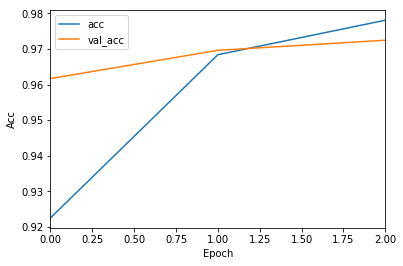

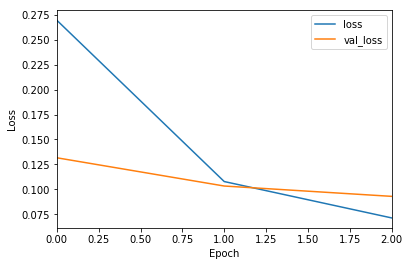

In [12]:
g1 = df1.plot.line()
g1.set_xlabel("Epoch")
g1.set_ylabel("Acc")

g2 = df2.plot.line()
g2.set_xlabel("Epoch")
g2.set_ylabel("Loss")

In [62]:
# import matplotlib.pyplot as plt
# def show_train_history(train_history,train,validation):
#     plt.plot(train_history.history[train])
#     plt.plot(train_history.history[validation])
#     plt.title('Train History')
#     plt.ylabel(train)
#     plt.xlabel('Epoch')
#     plt.legend(['train', 'validation'], loc='upper left')
#     plt.show()

In [63]:
# show_train_history(train_history,'acc','val_acc')

In [64]:
# show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [13]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 1s 142us/step

accuracy= 0.9726


## 建立模型，增加更多 Dense

In [36]:
model = Sequential()

# hidden layer
output_dim = 256; input_dim=x_train_image.shape[1]*x_train_image.shape[2]
model.add(Dense(units=output_dim, input_dim=input_dim, kernel_initializer="normal", activation="relu" ))
model.add(Dense(units=output_dim, kernel_initializer="normal", activation="relu" ))
model.add(Dense(units=output_dim, kernel_initializer="normal", activation="relu" ))

# output layer
output_dim = 10; 
model.add(Dense(units=output_dim, input_dim=input_dim, kernel_initializer="normal", activation="softmax" ))

# 訓練模型

In [37]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [38]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 36s 753us/step - loss: 0.2389 - acc: 0.9262 - val_loss: 0.1587 - val_acc: 0.9495
Epoch 2/10
48000/48000 [==============================] - 39s 821us/step - loss: 0.0992 - acc: 0.9702 - val_loss: 0.1108 - val_acc: 0.9667
Epoch 3/10
48000/48000 [==============================] - 37s 767us/step - loss: 0.0688 - acc: 0.9788 - val_loss: 0.0904 - val_acc: 0.9740
Epoch 4/10
48000/48000 [==============================] - 35s 737us/step - loss: 0.0525 - acc: 0.9837 - val_loss: 0.0981 - val_acc: 0.9748
Epoch 5/10
48000/48000 [==============================] - 36s 758us/step - loss: 0.0456 - acc: 0.9852 - val_loss: 0.1003 - val_acc: 0.9715
Epoch 6/10
48000/48000 [==============================] - 42s 870us/step - loss: 0.0364 - acc: 0.9887 - val_loss: 0.1134 - val_acc: 0.9706
Epoch 7/10
48000/48000 [==============================] - 44s 924us/step - loss: 0.0302 - acc: 0.9907 - val_loss: 0.

# 以圖形顯示訓練過程

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.DataFrame(train_history.history)
df1 = df[["acc", "val_acc"]]
df2 = df[["loss", "val_loss"]]

Text(0, 0.5, 'Loss')

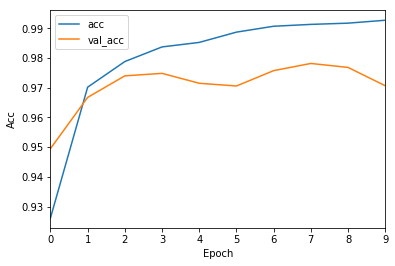

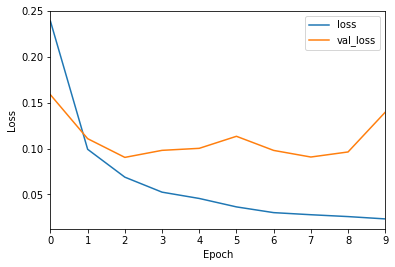

In [46]:
g1 = df1.plot.line()
g1.set_xlabel("Epoch")
g1.set_ylabel("Acc")

g2 = df2.plot.line()
g2.set_xlabel("Epoch")
g2.set_ylabel("Loss")

# 評估模型準確率

In [47]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 2s 154us/step

accuracy= 0.9728
